In [134]:
# Libraries
from bs4 import BeautifulSoup, Comment
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import urllib
import urllib2
import operator
import seaborn as sns
%matplotlib inline

In [17]:
# given a link, return the end of quarter squares
def get_quarters(link):
    page = urllib.urlopen(link).read()
    soup = BeautifulSoup(page, "lxml")
    table = soup.find_all('table')
    scores_table = table[0].find('tbody')
    trs = scores_table.find_all('tr')
    td_home = trs[0].find_all('td')[2:-1]
    td_away = trs[1].find_all('td')[2:-1]
    scores_qtr_home = [int(td.text) for td in td_home]
    scores_qtr_away = [int(td.text) for td in td_away]
    scores_home = np.cumsum(scores_qtr_home)
    scores_away = np.cumsum(scores_qtr_away)
    return [(a % 10, b % 10) for a,b in zip(scores_home, scores_away)]

In [18]:
# test
get_quarters('https://www.pro-football-reference.com/boxscores/201809060phi.htm')

[(3, 0), (6, 3), (6, 0), (2, 8)]

In [19]:
# get all games links from a given year, week combo
def get_week_links(yr, wk):
    link = 'https://www.pro-football-reference.com/years/' + str(yr) + '/week_' + str(wk) + '.htm'
    page = urllib.urlopen(link).read()
    soup = BeautifulSoup(page, "lxml")
    game_hrefs = soup.findAll('a', href=True, text='Final')
    game_links = ['https://www.pro-football-reference.com' \
              + href['href'] for href in game_hrefs]
    return game_links

In [20]:
# test
get_week_links(2018, 1)

['https://www.pro-football-reference.com/boxscores/201809060phi.htm',
 'https://www.pro-football-reference.com/boxscores/201809090cle.htm',
 'https://www.pro-football-reference.com/boxscores/201809090rav.htm',
 'https://www.pro-football-reference.com/boxscores/201809090nyg.htm',
 'https://www.pro-football-reference.com/boxscores/201809090nwe.htm',
 'https://www.pro-football-reference.com/boxscores/201809090nor.htm',
 'https://www.pro-football-reference.com/boxscores/201809090min.htm',
 'https://www.pro-football-reference.com/boxscores/201809090mia.htm',
 'https://www.pro-football-reference.com/boxscores/201809090clt.htm',
 'https://www.pro-football-reference.com/boxscores/201809090sdg.htm',
 'https://www.pro-football-reference.com/boxscores/201809090car.htm',
 'https://www.pro-football-reference.com/boxscores/201809090den.htm',
 'https://www.pro-football-reference.com/boxscores/201809090crd.htm',
 'https://www.pro-football-reference.com/boxscores/201809090gnb.htm',
 'https://www.pro-fo

In [21]:
# all game links from the 2016-2018 seasons
all_links = []
for yr in range(2016, 2019):
    for wk in range(1, 18):
        all_links += get_week_links(yr, wk)

In [22]:
# sanity check
len(all_links)

768

In [25]:
# matrices for each quarter and combined
sb_squares = np.zeros((10,10))
sb_squares_q1 = np.zeros((10,10))
sb_squares_q2 = np.zeros((10,10))
sb_squares_q3 = np.zeros((10,10))
sb_squares_q4 = np.zeros((10,10))

In [26]:
# add to matrices depending on square that hits
for i, link in enumerate(all_links):
    try:
        qtr_ends = get_quarters(link)
        sb_squares_q1[qtr_ends[0]] += 1
        sb_squares_q2[qtr_ends[1]] += 1
        sb_squares_q3[qtr_ends[2]] += 1
        sb_squares_q4[qtr_ends[3]] += 1
        for qtr_end in qtr_ends:
            sb_squares[qtr_end] += 1
    except:
        print i

In [28]:
# check
sb_squares_q4

array([[ 22.,   8.,   6.,  20.,  15.,   9.,  19.,  29.,   7.,   7.],
       [  5.,  11.,   3.,   3.,  12.,   3.,   6.,   7.,   6.,   5.],
       [  4.,   5.,   2.,   2.,   4.,   2.,   7.,   5.,   4.,   3.],
       [ 17.,  19.,   4.,  14.,  15.,   6.,  12.,   9.,   9.,   9.],
       [ 13.,  15.,   4.,   9.,  10.,   1.,  10.,  18.,   8.,   7.],
       [  9.,   2.,   1.,   5.,   6.,   1.,   5.,   4.,   5.,   0.],
       [ 13.,   1.,   2.,   8.,  11.,   6.,   8.,   5.,   4.,   2.],
       [ 24.,  14.,   8.,  20.,  24.,   4.,   9.,  18.,   7.,   5.],
       [  2.,  12.,   2.,   4.,   5.,   0.,   5.,   5.,   4.,   1.],
       [  6.,   1.,   3.,   2.,   5.,   2.,   6.,  13.,   3.,   6.]])

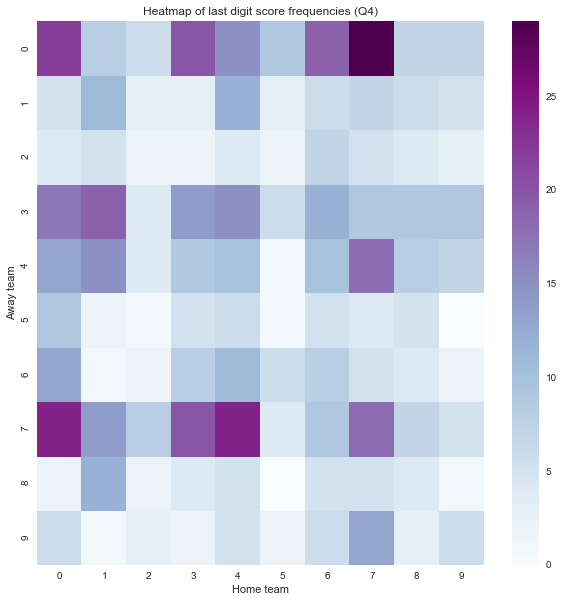

In [42]:
# heatmaps
fig = plt.figure(figsize=(10,10))
r = sns.heatmap(sb_squares_q4, cmap='BuPu')
r.set_title("Heatmap of last digit score frequencies (Q4)")
r.set(xlabel='Home team', ylabel='Away team')
plt.show()

In [93]:
# expected values total
score_dict_ev = {}
for i in range(len(sb_squares)):
    for j in range(len(sb_squares)):
        score_dict_ev[(i, j)] = (sb_squares/sum(sum(sb_squares))*1000)[i][j]

In [94]:
# sort
sorted_score_dict_ev = sorted(score_dict_ev.items(), key=operator.itemgetter(1), reverse=True)

In [95]:
# display
sorted_score_dict_ev

[((0, 0), 78.676942838792556),
 ((0, 7), 67.116249197174056),
 ((7, 0), 59.73025048169557),
 ((3, 0), 52.02312138728324),
 ((0, 3), 48.490687219010915),
 ((7, 7), 41.425818882466281),
 ((3, 7), 35.645472061657031),
 ((0, 4), 33.397559409120106),
 ((7, 3), 30.828516377649326),
 ((3, 3), 29.865125240847785),
 ((7, 4), 23.442517662170843),
 ((4, 0), 23.121387283236992),
 ((0, 6), 20.873474630700066),
 ((3, 4), 20.873474630700066),
 ((4, 7), 20.873474630700066),
 ((3, 6), 18.625561978163134),
 ((6, 0), 16.698779704560053),
 ((4, 4), 14.129736673089274),
 ((6, 7), 13.48747591522158),
 ((7, 6), 13.166345536287732),
 ((0, 1), 12.845215157353886),
 ((6, 4), 11.881824020552344),
 ((7, 1), 11.23956326268465),
 ((3, 1), 10.918432883750802),
 ((6, 3), 10.918432883750802),
 ((4, 3), 10.918432883750802),
 ((4, 6), 9.3127809890815669),
 ((1, 7), 8.6705202312138727),
 ((0, 9), 8.6705202312138727),
 ((1, 4), 8.3493898522800265),
 ((3, 9), 8.3493898522800265),
 ((6, 6), 8.3493898522800265),
 ((4, 1), 8.

In [98]:
# alternate payout structure (20-20-20-40)
alt_payout = sb_squares_q1*0.2 + sb_squares_q2*0.2 + sb_squares_q3*0.2 + sb_squares_q4*0.4

In [99]:
# expected values total
score_dict_ev_alt = {}
for i in range(len(alt_payout)):
    for j in range(len(alt_payout)):
        score_dict_ev_alt[(i, j)] = (alt_payout/sum(sum(alt_payout))*1000)[i][j]

In [100]:
# sort
sorted_score_dict_ev_alt = sorted(score_dict_ev_alt.items(), key=operator.itemgetter(1), reverse=True)

In [101]:
# display
sorted_score_dict_ev_alt

[((0, 0), 69.53125),
 ((0, 7), 61.718749999999993),
 ((7, 0), 54.166666666666671),
 ((3, 0), 46.354166666666671),
 ((0, 3), 44.270833333333336),
 ((7, 7), 38.020833333333329),
 ((3, 7), 30.729166666666668),
 ((0, 4), 30.729166666666668),
 ((7, 3), 29.427083333333336),
 ((3, 3), 27.864583333333336),
 ((7, 4), 24.739583333333332),
 ((4, 0), 21.875000000000004),
 ((0, 6), 21.614583333333336),
 ((3, 4), 20.833333333333332),
 ((4, 7), 20.833333333333332),
 ((6, 0), 16.927083333333332),
 ((3, 6), 16.927083333333332),
 ((4, 4), 14.0625),
 ((3, 1), 13.802083333333334),
 ((7, 6), 13.020833333333334),
 ((0, 1), 12.500000000000002),
 ((6, 4), 12.500000000000002),
 ((7, 1), 12.500000000000002),
 ((6, 7), 12.239583333333334),
 ((4, 3), 11.197916666666666),
 ((6, 3), 10.677083333333332),
 ((4, 1), 10.15625),
 ((4, 6), 10.15625),
 ((1, 4), 9.6354166666666679),
 ((9, 7), 9.375),
 ((1, 7), 8.8541666666666679),
 ((0, 9), 8.8541666666666679),
 ((6, 6), 8.59375),
 ((3, 9), 8.5937499999999982),
 ((1, 1), 7

In [122]:
# get EV for specific matrix
def get_evs(sb_squares):
    score_dict_ev = {}
    for i in range(len(sb_squares)):
        for j in range(len(sb_squares)):
            score_dict_ev[(i, j)] = (sb_squares/sum(sum(sb_squares))*1000*0.25)[i][j]
    sorted_score_dict_ev = sorted(score_dict_ev.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_score_dict_ev

In [123]:
get_evs(sb_squares_q1)

[((0, 0), 42.317708333333336),
 ((0, 7), 34.1796875),
 ((7, 0), 24.088541666666668),
 ((3, 0), 22.135416666666668),
 ((0, 3), 20.833333333333332),
 ((7, 7), 19.205729166666668),
 ((3, 7), 12.369791666666666),
 ((0, 4), 11.71875),
 ((3, 3), 10.7421875),
 ((7, 3), 8.4635416666666661),
 ((6, 7), 4.8828125),
 ((4, 0), 4.231770833333333),
 ((0, 6), 3.90625),
 ((4, 7), 3.90625),
 ((6, 0), 2.9296875),
 ((3, 4), 2.9296875),
 ((7, 4), 2.2786458333333335),
 ((4, 3), 1.953125),
 ((7, 6), 1.6276041666666667),
 ((0, 2), 1.6276041666666667),
 ((0, 9), 1.6276041666666667),
 ((6, 3), 1.6276041666666667),
 ((0, 1), 1.3020833333333333),
 ((3, 6), 1.3020833333333333),
 ((4, 6), 1.3020833333333333),
 ((2, 3), 0.9765625),
 ((2, 0), 0.9765625),
 ((6, 4), 0.65104166666666663),
 ((7, 1), 0.65104166666666663),
 ((4, 4), 0.65104166666666663),
 ((9, 0), 0.32552083333333331),
 ((7, 5), 0.32552083333333331),
 ((0, 5), 0.32552083333333331),
 ((1, 0), 0.32552083333333331),
 ((2, 7), 0.32552083333333331),
 ((8, 3), 0

In [124]:
get_evs(sb_squares_q2)

[((0, 0), 17.903645833333332),
 ((7, 0), 15.950520833333332),
 ((0, 7), 13.020833333333334),
 ((3, 0), 13.020833333333334),
 ((3, 7), 11.71875),
 ((0, 3), 11.067708333333334),
 ((0, 4), 10.416666666666666),
 ((7, 7), 10.091145833333334),
 ((7, 3), 8.1380208333333339),
 ((4, 0), 8.1380208333333339),
 ((3, 3), 8.1380208333333339),
 ((3, 4), 7.161458333333333),
 ((3, 6), 6.510416666666667),
 ((0, 6), 6.510416666666667),
 ((7, 4), 6.184895833333333),
 ((0, 1), 5.533854166666667),
 ((4, 4), 5.208333333333333),
 ((7, 6), 4.8828125),
 ((6, 7), 3.90625),
 ((6, 0), 3.90625),
 ((6, 3), 3.90625),
 ((4, 7), 3.5807291666666665),
 ((6, 6), 3.2552083333333335),
 ((4, 3), 3.2552083333333335),
 ((3, 1), 2.9296875),
 ((6, 4), 2.9296875),
 ((1, 7), 2.9296875),
 ((0, 9), 2.9296875),
 ((7, 9), 2.9296875),
 ((7, 1), 2.6041666666666665),
 ((1, 0), 2.6041666666666665),
 ((9, 4), 2.2786458333333335),
 ((4, 6), 2.2786458333333335),
 ((9, 0), 1.953125),
 ((4, 1), 1.6276041666666667),
 ((3, 9), 1.6276041666666667

In [127]:
get_evs(sb_squares_q3)

[((0, 0), 12.369791666666666),
 ((7, 0), 12.044270833333334),
 ((3, 0), 11.71875),
 ((0, 7), 11.067708333333334),
 ((0, 3), 10.416666666666666),
 ((3, 7), 8.4635416666666661),
 ((7, 3), 7.161458333333333),
 ((7, 4), 6.8359375),
 ((4, 7), 6.8359375),
 ((3, 3), 6.8359375),
 ((4, 0), 6.510416666666667),
 ((0, 4), 6.510416666666667),
 ((7, 7), 6.510416666666667),
 ((3, 4), 6.184895833333333),
 ((6, 0), 5.859375),
 ((3, 6), 5.533854166666667),
 ((4, 4), 5.208333333333333),
 ((6, 4), 4.8828125),
 ((0, 6), 4.231770833333333),
 ((7, 6), 3.90625),
 ((0, 1), 3.5807291666666665),
 ((7, 8), 3.5807291666666665),
 ((1, 7), 3.5807291666666665),
 ((9, 0), 3.2552083333333335),
 ((6, 7), 3.2552083333333335),
 ((7, 1), 3.2552083333333335),
 ((1, 4), 3.2552083333333335),
 ((3, 9), 3.2552083333333335),
 ((1, 0), 2.9296875),
 ((3, 8), 2.9296875),
 ((4, 3), 2.9296875),
 ((4, 6), 2.6041666666666665),
 ((1, 3), 2.6041666666666665),
 ((6, 3), 2.6041666666666665),
 ((6, 6), 2.2786458333333335),
 ((3, 1), 1.95312

In [138]:
print(np.std([x for _, x in get_evs(sb_squares)]))
print np.std([x for _, x in get_evs(sb_squares_q1)])
print np.std([x for _, x in get_evs(sb_squares_q2)])
print np.std([x for _, x in get_evs(sb_squares_q3)])
print np.std([x for _, x in get_evs(sb_squares_q4)])

3.62573512559
6.93013594824
3.73424469859
2.88811652137
1.94653837295


## Super Bowl specific

In [105]:
sb_links = []
for yr in range(2001,2019):
    sb_links += get_week_links(yr, 21)

In [111]:
sb_squares_sb = np.zeros((10,10))
sb_squares_sb_q1 = np.zeros((10,10))
sb_squares_sb_q2 = np.zeros((10,10))
sb_squares_sb_q3 = np.zeros((10,10))
sb_squares_sb_q4 = np.zeros((10,10))

In [112]:
for i, link in enumerate(sb_links):
    try:
        qtr_ends = get_quarters(link)
        sb_squares_sb_q1[qtr_ends[0]] += 1
        sb_squares_sb_q2[qtr_ends[1]] += 1
        sb_squares_sb_q3[qtr_ends[2]] += 1
        sb_squares_sb_q4[qtr_ends[3]] += 1
        for qtr_end in qtr_ends:
            sb_squares_sb[qtr_end] += 1
    except:
        print i

In [114]:
sb_squares_sb/sum(sum(sb_squares_sb))

array([[ 0.10769231,  0.03076923,  0.        ,  0.01538462,  0.03076923,
         0.        ,  0.        ,  0.01538462,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.01538462,  0.03076923,
         0.        ,  0.        ,  0.03076923,  0.        ,  0.        ],
       [ 0.01538462,  0.        ,  0.01538462,  0.        ,  0.        ,
         0.        ,  0.        ,  0.01538462,  0.        ,  0.01538462],
       [ 0.04615385,  0.01538462,  0.        ,  0.03076923,  0.        ,
         0.        ,  0.        ,  0.07692308,  0.03076923,  0.        ],
       [ 0.04615385,  0.        ,  0.        ,  0.        ,  0.04615385,
         0.        ,  0.        ,  0.        ,  0.03076923,  0.        ],
       [ 0.        ,  0.01538462,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.01538462,  0.        ,  0.        ],
       [ 0.01538462,  0.01538462,  0.        ,  0.        ,  0.03076923,
         0.        ,  0.        ,  0.03076923

## Debug

In [30]:
link = 'https://www.pro-football-reference.com/boxscores/201710290cle.htm'
page = urllib.urlopen(link).read()

In [31]:
soup = BeautifulSoup(page, "lxml")

In [32]:
table = soup.find_all('table')
scores_table = table[0].find('tbody')

In [33]:
trs = scores_table.find_all('tr')

In [34]:
td_home = trs[0].find_all('td')[2:-1]
td_away = trs[1].find_all('td')[2:-1]

In [35]:
scores_qtr_home = [int(td.text) for td in td_home]
scores_qtr_away = [int(td.text) for td in td_away]

In [37]:
scores_home = np.cumsum(scores_qtr_home)
scores_away = np.cumsum(scores_qtr_away)

In [38]:
[(a % 10, b % 10) for a,b in zip(scores_home, scores_away)]

[(3, 6), (2, 3), (3, 6), (3, 6)]